# Data Visualization for Iris data set
1. Source: kaaggle dataset  [Iris](https://www.kaggle.com/datasets/uciml/iris/data)
2. parameters:  

  *  **Id**
  *  **SepalLengthCm**

  *  **SepalWidthCm**

  *  **PetalLengthCm**

  *  **PetalWidthCm**

  *  **Species**
  \
  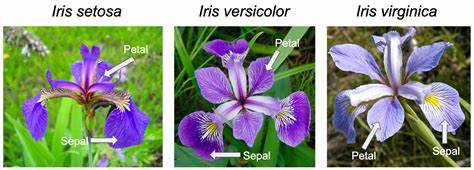

In [291]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas import get_dummies
import warnings
warnings.filterwarnings('ignore')

In [292]:
#Reading the dataset
df = pd.read_csv('/content/Iris (1).csv')

In [293]:
# printing the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [294]:
#getting the summarry of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Data dosen't have any null values and only one coloumn seems to have object values

In [295]:
#Describing the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


From describing data there is slight diff between 75%(upper quartile region) and max (outer extreme) suggesting possible outliers

In [296]:
# Group by 'Species' and compute the mean
grouped_df = df.groupby("Species").mean(numeric_only=True)

# Display the result
print(grouped_df)

                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770          4.260   
Iris-virginica   125.5          6.588         2.974          5.552   

                 PetalWidthCm  
Species                        
Iris-setosa             0.244  
Iris-versicolor         1.326  
Iris-virginica          2.026  


This will output the mean values for each species

In [297]:
# Using .agg() to apply multiple functions
agg_results = df.groupby('Species').agg({
    'SepalLengthCm': ['mean', 'min', 'max', 'std'],  # Aggregation for Sepal Length
    'SepalWidthCm': ['mean', 'median'],  # Aggregation for Sepal Width
    'PetalLengthCm': ['sum', 'count'],  # Aggregation for Petal Length
})

print("\nAggregated Data:\n", agg_results)


Aggregated Data:
                 SepalLengthCm                     SepalWidthCm         \
                         mean  min  max       std         mean median   
Species                                                                 
Iris-setosa             5.006  4.3  5.8  0.352490        3.418    3.4   
Iris-versicolor         5.936  4.9  7.0  0.516171        2.770    2.8   
Iris-virginica          6.588  4.9  7.9  0.635880        2.974    3.0   

                PetalLengthCm        
                          sum count  
Species                              
Iris-setosa              73.2    50  
Iris-versicolor         213.0    50  
Iris-virginica          277.6    50  


1. agg() allows multiple aggregation functions on different columns.

In [298]:
# finding the null values in data set
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


There are no null values in dataset

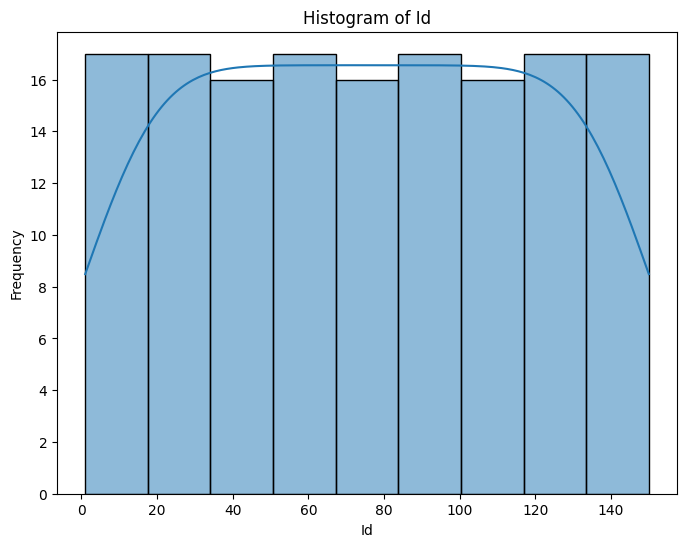

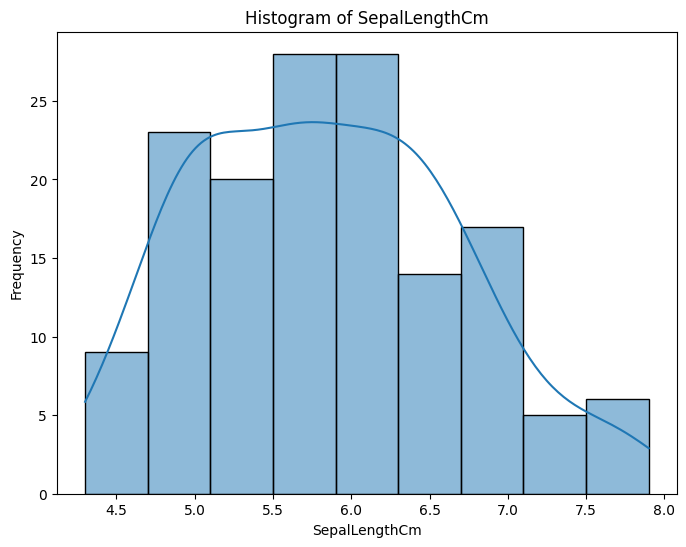

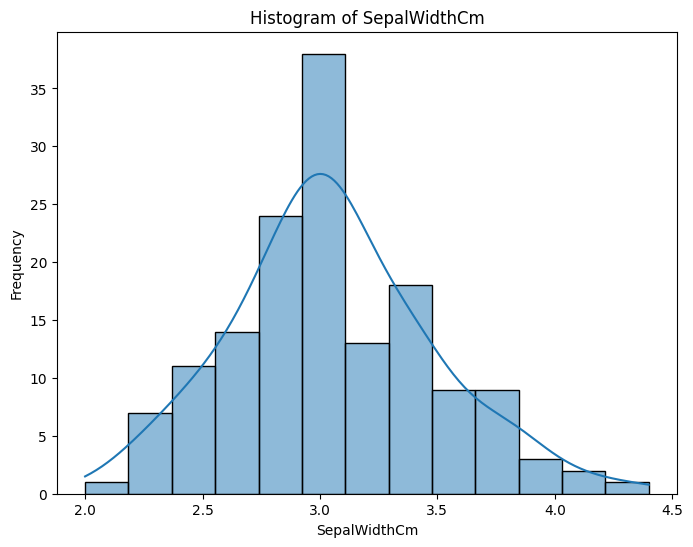

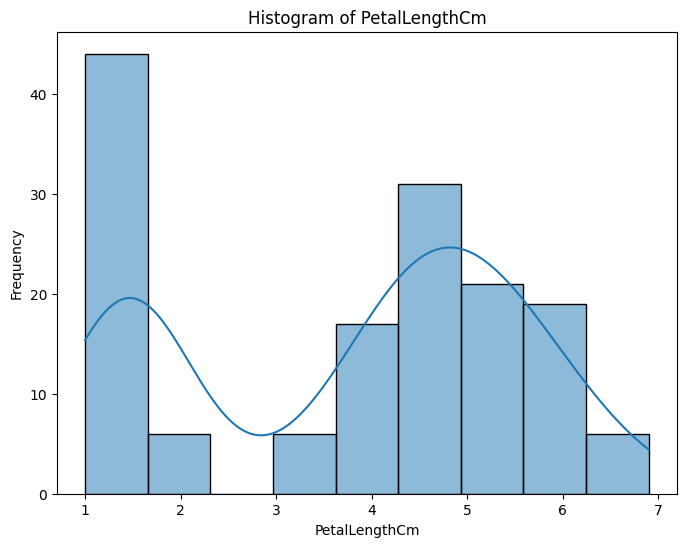

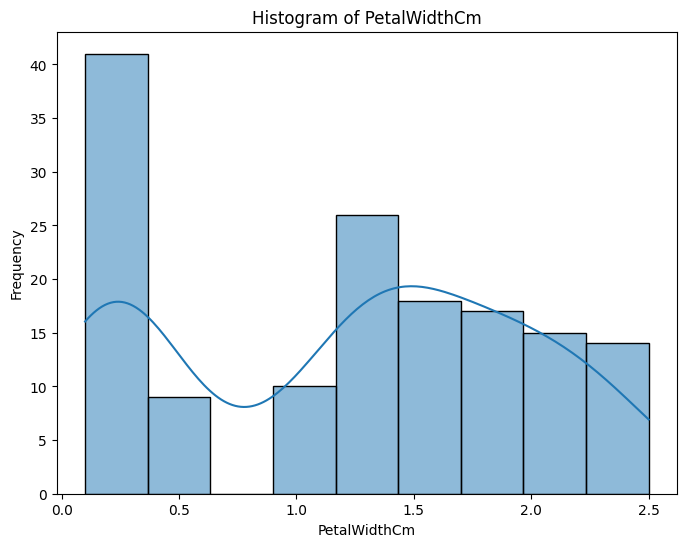

In [299]:
# Loop through all numeric columns and create histograms
for column in df.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True)  # Use seaborn for a nicer histogram
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


1. Sepal Length is Slightly skewed right and most flowers have sepal lengths between 5.0 and 6.5 cm.so there might be few values exceed 7.5 cm, but no extreme outliers.
2. Sepal Width
Almost normally distributed, with most values ranging between 2.5 and 3.5 cm.
A few narrow-sepal flowers have widths below 2.0 cm, indicating possible outliers.
3. Petal Length
Strongly right-skewed, with most flowers having petal lengths below 2 cm.
A few values exceed 5 cm, likely indicating different species characteristics.
4. Petal Width
Bimodal distribution (two peaks), suggesting clear species separation.
One group has widths near 0.3 cm, while another is around 1.5 cm, indicating two distinct sets of flowers.

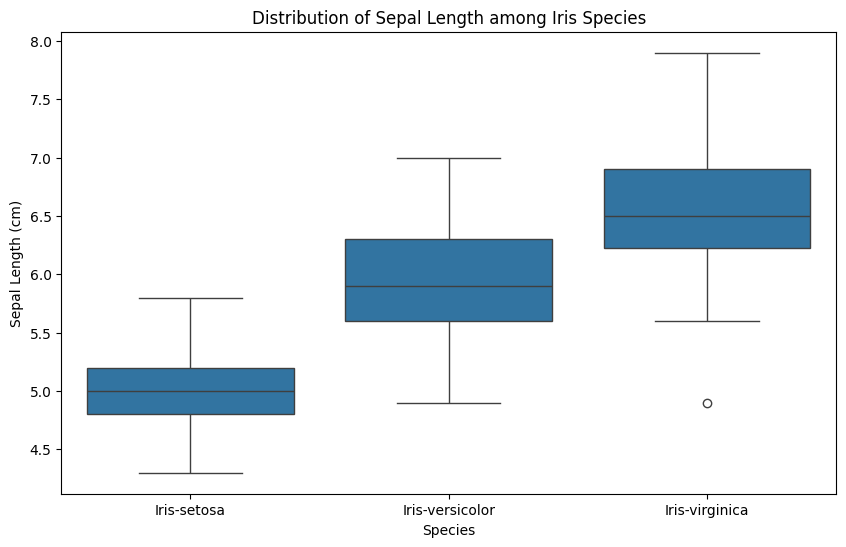

In [300]:
# box plot for distribution of sepal width and sepal lenght
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Distribution of Sepal Length among Iris Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()


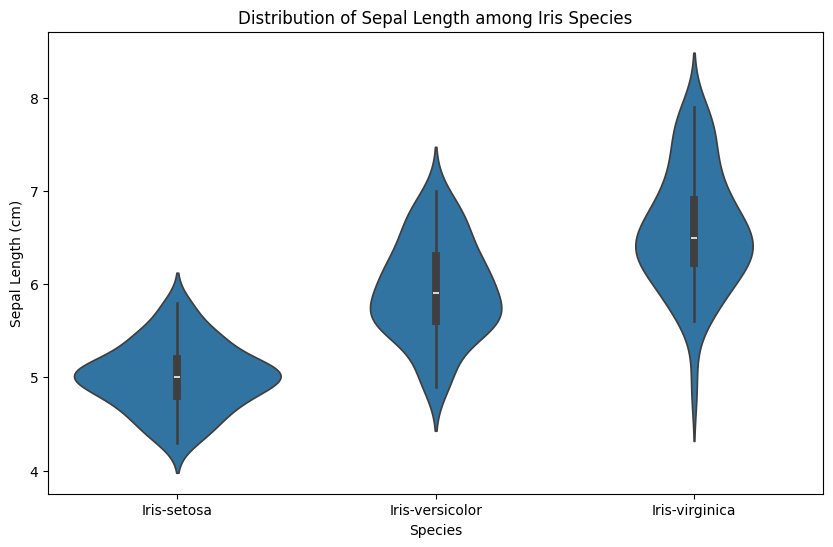

In [301]:
# violin plot for distribution of sepal width and sepal lenght
plt.figure(figsize=(10, 6))
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Distribution of Sepal Length among Iris Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

From boxplot and violin plots we can infer:

1.  **Sepal lenght**
     
    *   Iris-setosa -- sepal lenght ranges between  approx. ~4.5 to 5.8 with Iqr region between ~ 4.8 to 5.3 so most data is concentrated in this region it inflicts most setosa species have less sepal length

    *   Iris-versicolor --- sepal lenght ranges between  approx. ~4.8 to 7 with Iqr region between ~ 5.6 to 6.4 so most data is concentrated in this region it inflicts most versicolor species have moderate sepal length and

    *   Iris-virginica --- this species have high variability of sepal lengths from a range of ~ 5.7 to 7.9 with an outlier and most data concentrated around ~6.3 to 6.9 so this species have high sepal length

2. **Sepal width**
    
    * Iris-setosa -- sepal width ranges from ~2.3 to 4.4 with iqr between 3.2 to 3.7 so setosa has high variablity in speal width but most data concentrated between 3.2 to 3.7

    * Iris-versicolor --- sepal width ranges from ~ 2 to 3.4 and  Iqr between ~2.5 to 3 so it has less sepal width

    *  Iris-virginica --- sepal width ranges from ~2.5 to 3.6 with 2 outliers presnt and most data points between ~ 2.8 to 3.2 and iqr is comparitively less so the variablility of sepal width is less for virginia species but the overall sepal width is moderate

 so to conclude Iris setosa has less sepal lenght and high sepal width, Iris versicolor has moderate sepal width and length and Iris virginica has high sepal length and less sepal width   




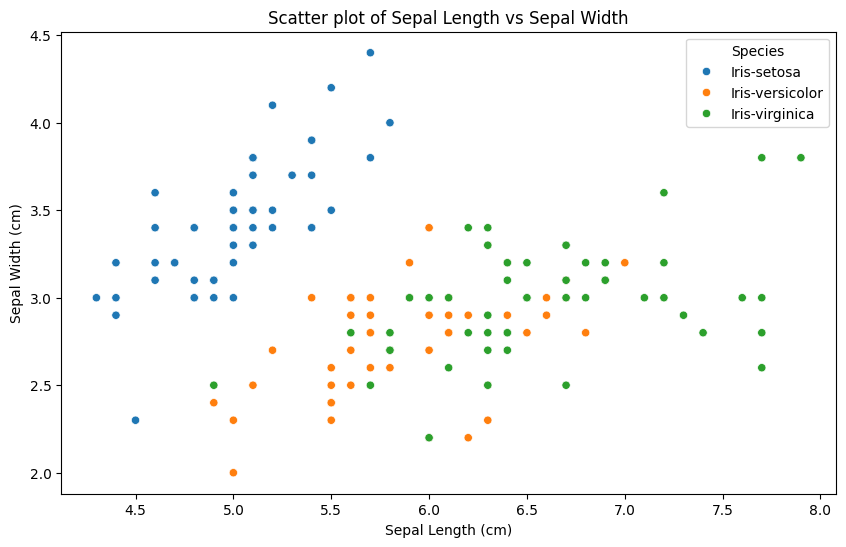

In [302]:
# Plotting the distribution of sepal lengths and widths for different iris species
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species')
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

1. from the scatter plot :
    *   iris setosa has less sepal lenght ~4.5 to 5.8 and high sepal width ~2.3 to 4.4
    *  Iris versicolor has moderate sepal length from ~4.9 to 7 and less sepal width from ~ 2 to 3.4
    *  Iris virginica has high sepal length from ~5.6 to 7.9 and moderate sepal width ~2.3 to 3.9



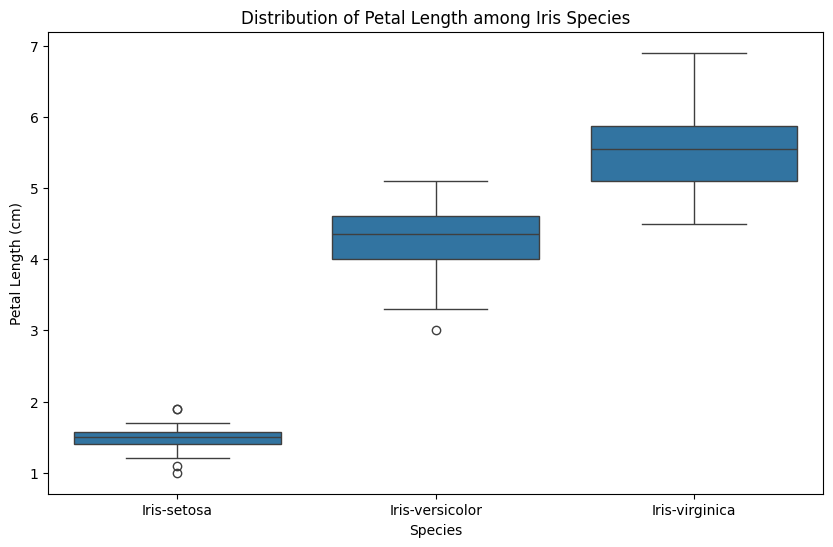

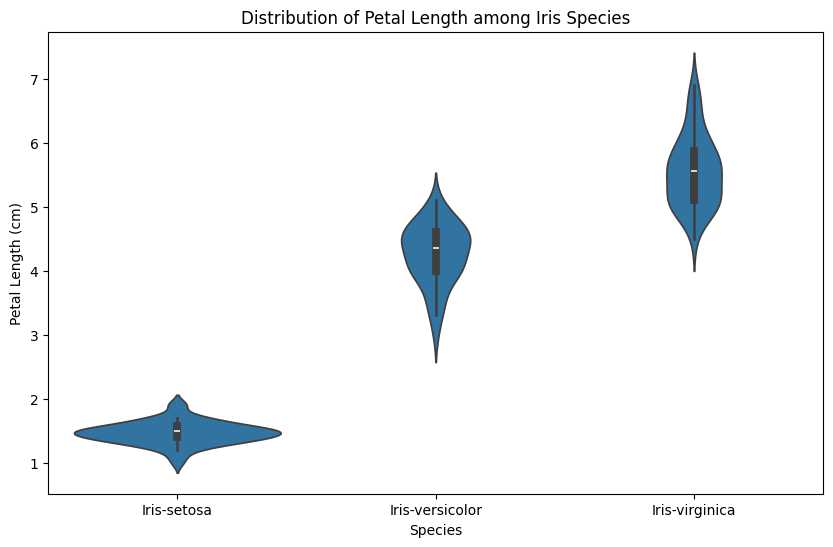

In [303]:
#boxplot and violin plot for petal length across different Iris species
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Distribution of Petal Length among Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Distribution of Petal Length among Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

1. iris setosa has very less petal length ~1.2 to 1.8 , iqr between ~1.4 to 1.6 iqr width is low so variability of petal length is low  and has few ouliers
2. versicolor has moderate petal length ~3 to 5 , iqr between ~3.9 to 4.5 and has an outlier, moderate variability in petal lenght
3. virginica has high petal length ~ 4.5 to 7 , iqr between ~5 to 5.8 and iqr width is high so variability of petal lenght is high

The correlation between sepal length and petal length is: 0.8717541573048718


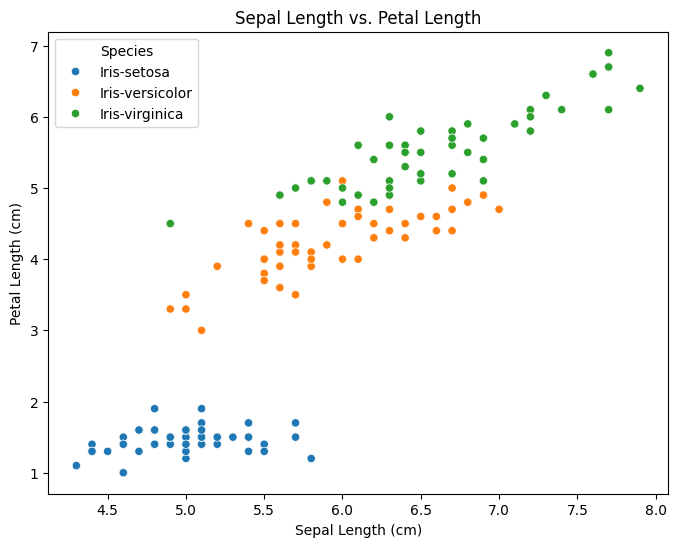

In [304]:
# correlation between sepal length and petal length
correlation = df['SepalLengthCm'].corr(df['PetalLengthCm'])
print(f"The correlation between sepal length and petal length is: {correlation}")

# scatter plot between sepal lenght and petal length
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', data=df, hue='Species')
plt.title('Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

1. The corellation between petal lenght and sepal legnth is high 0.87
2. setosa has less petal length and sepal length (petal length from ~1 to 2, sepal length ~4.5 to 5.8)
3. Versicolor has moderate petal and sepal length (petal length ~3 to 5, sepal len ~ 5 to 7)
4. virginica has high sepal and petal length (sepal length ~ 5.5 to 7.9, petal length ~4.5 to 7)

So if sepal length is high petal length is also high ,if sepal length is low
 petal length is also low so sepal and petal length are directly proportional or in linear relationship with eachother


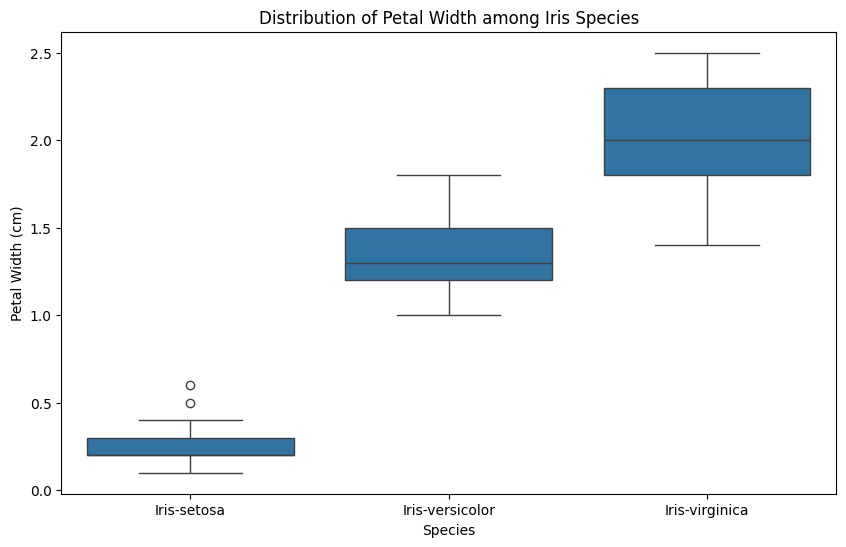

In [305]:
# boxplot and violin plot for petal width across different Iris species
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Distribution of Petal Width among Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.show()



1. Petal width for iris sepcies
    
    *   Setosa has less petal width with a range of ~0. to 0.4 and iqr between ~0.3 to 0.4 and the width of iqr is low so less variability in petal width and has few outliers
    *   versicolor has moderate petal with  from ~1 to 1.8 and iqr between ~1.2 to 1.5 and width of iqr region is moderate so moderate variability in petal width
    *  virginica has high petal width from ~1.4 to 2.5, Iqr between ~ 1.7 to 2.3 and width of iqr is more so more variability in petal width or more flowers has a differnt petal widths

In [306]:
# Getting the dummy values for Species colomn
df = pd.get_dummies(df, columns=['Species'], prefix=['Species']).astype(int)
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0   1              5             3              1             0   
1   2              4             3              1             0   
2   3              4             3              1             0   
3   4              4             3              1             0   
4   5              5             3              1             0   

   Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
0                    1                        0                       0  
1                    1                        0                       0  
2                    1                        0                       0  
3                    1                        0                       0  
4                    1                        0                       0  


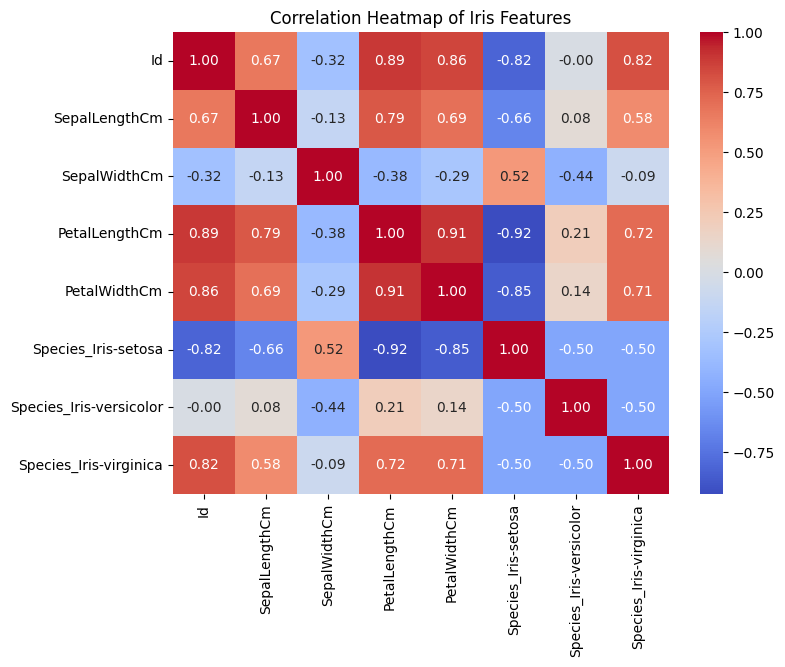

In [307]:
#  correlation heatmap for numerical colomns
numerical_cols = df.select_dtypes(include=['number'])
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Iris Features')
plt.show()

1. petal length and petal width has high correlation 0.96
2. sepal length and septal width has low corr -0.11
3. sepal length and petal length has strong corr 0.87
4. sepal lenght and petal width also has strong corr 0.82
5. sepal width and petal length and width has low / negative corr  -0.42,-0.36 repectively
6. Iris setosa has hig corr with sepal width 0.52
7. Iris versicolor has high corr with petal length and petalwidth which is 0.21 and 0.14 resp.
8. Iris-virginicia has high corr with sepal length ,petal length and petalwidth which is 0.58, 0.72, and 0.71 resp.

For variables with high correlation
1. If petal width is low ,petal length is low, petal lenght is high petal width is high so they have linear relationship
2. sepal length and petal length are also in linear relationship So if sepal length is high petal length is also high ,if sepal length is low petal length is also low so sepal and petal length are directly proportional  
3. speal length is low then petal width is low ,petal width is high then sepal length is moderate and when sepal length is moderate then petal width is also moderate

##**Inference**
1. Petal length and petal width for

   *   Iris setosa :     
         * smaller petal length (less than 2 cm)
         * small petal width (less than 0.5 cm)

   *   Iris versicolor :    
        * intermediate petal length(~3 to 5)
        * intermediate petal width (~ 1 to 1.8)

   *   Iris virginica
        * larger petal length (~4.5 to 7)
        * large petal width(~1.4 to 2.5)

2. Sepal length and sepal width for
    *   iris setosa has less sepal lenght ~4.5 to 5.8 and high sepal width ~2.3 to 4.4
    *  Iris versicolor has moderate sepal length from ~4.9 to 7 and less sepal width from ~ 2 to 3.4
    *  Iris virginica has high sepal length from ~5.6 to 7.9 and moderate sepal width ~2.3 to 3.9
    
So  to conclude \
**Iris setosa** has **smaller** sepals and petals, \
  **Iris** **versicolor** has **intermediate** sepals and petals,  \
   **Iris virginica** has **larger** sepals and petals





In [308]:
# Select numerical columns (excluding categorical ones like 'species')
numeric_columns = df.select_dtypes(include=['number']).columns

# Apply Min-Max Normalization
df_normalized = df.copy()
df_normalized[numeric_columns] = (df[numeric_columns] - df[numeric_columns].min()) / (df[numeric_columns].max() - df[numeric_columns].min())

print("\nFirst 5 rows after normalization:\n", df_normalized.head())



First 5 rows after normalization:
          Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0  0.000000       0.333333           0.5            0.0           0.0   
1  0.006711       0.000000           0.5            0.0           0.0   
2  0.013423       0.000000           0.5            0.0           0.0   
3  0.020134       0.000000           0.5            0.0           0.0   
4  0.026846       0.333333           0.5            0.0           0.0   

   Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
0                  1.0                      0.0                     0.0  
1                  1.0                      0.0                     0.0  
2                  1.0                      0.0                     0.0  
3                  1.0                      0.0                     0.0  
4                  1.0                      0.0                     0.0  


1. Normalization is used to scale numerical data between a fixed range (usually 0 to 1) to make it comparable across different features.

In [309]:
# Apply log transformation to numerical features (add a small constant to avoid log(0))
df_log_transformed = df.copy()
for column in numeric_columns:
    df_log_transformed[column] = np.log(df[column] + 1)  # Add 1 to avoid log(0)

print("\nFirst 5 rows after log transformation:\n", df_log_transformed.head())



First 5 rows after log transformation:
          Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0  0.693147       1.791759      1.386294       0.693147           0.0   
1  1.098612       1.609438      1.386294       0.693147           0.0   
2  1.386294       1.609438      1.386294       0.693147           0.0   
3  1.609438       1.609438      1.386294       0.693147           0.0   
4  1.791759       1.791759      1.386294       0.693147           0.0   

   Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
0             0.693147                      0.0                     0.0  
1             0.693147                      0.0                     0.0  
2             0.693147                      0.0                     0.0  
3             0.693147                      0.0                     0.0  
4             0.693147                      0.0                     0.0  


1. Log Transformation is used to reduce skewness in data and handle outliers by compressing large values. It helps stabilize variance and makes patterns more linear for machine learning models.

In [310]:
# Create an array from a list
arr1 = np.array([1, 2, 3, 4, 5])
print("Array using np.array():", arr1)

# Create an array filled with zeros
arr_zeros = np.zeros((2, 3))  # 2 rows, 3 columns
print("\nArray of Zeros:\n", arr_zeros)

# Create an array filled with ones
arr_ones = np.ones((3, 2))  # 3 rows, 2 columns
print("\nArray of Ones:\n", arr_ones)

# Create an array with random values between 0 and 1
arr_random = np.random.rand(3, 3)  # 3x3 matrix
print("\nRandom Array:\n", arr_random)


Array using np.array(): [1 2 3 4 5]

Array of Zeros:
 [[0. 0. 0.]
 [0. 0. 0.]]

Array of Ones:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]

Random Array:
 [[0.6721936  0.14707398 0.11460996]
 [0.45121645 0.15984788 0.3925532 ]
 [0.84097149 0.42915671 0.27557777]]


1. np.array() creates an array from a Python list.
2. np.zeros((rows, cols)) creates a 2x3 matrix filled with zeros.
3. np.ones((rows, cols)) creates a 3x2 matrix filled with ones.
4. np.random.rand(rows, cols) creates a 3x3 matrix of random values between 0 and 1.

In [311]:
# Two arrays for element-wise operations
arrA = np.array([10, 20, 30, 40])
arrB = np.array([1, 2, 3, 4])

# Element-wise addition, subtraction, multiplication, division
print("\nElement-wise Addition:", arrA + arrB)
print("Element-wise Subtraction:", arrA - arrB)
print("Element-wise Multiplication:", arrA * arrB)
print("Element-wise Division:", arrA / arrB)

# Apply mathematical functions
print("\nSquare root of arrA:", np.sqrt(arrA))
print("Exponential of arrA:", np.exp(arrA))
print("Sine of arrA:", np.sin(arrA))



Element-wise Addition: [11 22 33 44]
Element-wise Subtraction: [ 9 18 27 36]
Element-wise Multiplication: [ 10  40  90 160]
Element-wise Division: [10. 10. 10. 10.]

Square root of arrA: [3.16227766 4.47213595 5.47722558 6.32455532]
Exponential of arrA: [2.20264658e+04 4.85165195e+08 1.06864746e+13 2.35385267e+17]
Sine of arrA: [-0.54402111  0.91294525 -0.98803162  0.74511316]


1. arr1 + arr2 → Adds corresponding elements of two arrays.
2. arr1 - arr2 → Subtracts corresponding elements.
3. arr1 * arr2 → Multiplies corresponding elements.
4. arr1 / arr2 → Divides corresponding elements.
5. np.sqrt(arr) → Computes the square root of each element.
6. np.exp(arr) → Computes the exponential (e^x) of each element.
7. np.sin(arr) → Computes the sine of each element.

In [312]:
arr = np.arange(1, 13)  # Create an array from 1 to 12
reshaped_arr = arr.reshape(3, 4)  # Reshape into a 3x4 matrix
print("\nOriginal Array:", arr)
print("Reshaped 3x4 Array:\n", reshaped_arr)



Original Array: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Reshaped 3x4 Array:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


1. arr.reshape(rows, cols) → Changes the shape of an array without changing data.

In [313]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])  # 2x3 matrix
arr2 = np.array([[7, 8, 9], [10, 11, 12]])  # 2x3 matrix

# Horizontal stacking (side by side)
hstacked = np.hstack((arr1, arr2))
print("\nHorizontally Stacked Arrays:\n", hstacked)

# Vertical stacking (one below another)
vstacked = np.vstack((arr1, arr2))
print("\nVertically Stacked Arrays:\n", vstacked)



Horizontally Stacked Arrays:
 [[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]

Vertically Stacked Arrays:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


1. np.hstack((arr1, arr2)) → Stacks two arrays horizontally (side by side).
2. np.vstack((arr1, arr2)) → Stacks two arrays vertically (one above the other).

In [314]:
# Select specific columns
selected_columns = df[['SepalLengthCm', 'SepalWidthCm']]
print(selected_columns.head())

   SepalLengthCm  SepalWidthCm
0              5             3
1              4             3
2              4             3
3              4             3
4              5             3


Selecting only sepecific colomns SepalLengthCm and SepalWidthCm

In [315]:
# Filter rows based on a condition
filtered_rows = df[df['SepalLengthCm'] > 5.0]
print(filtered_rows.head())


    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
50  51              7             3              4             1   
51  52              6             3              4             1   
52  53              6             3              4             1   
54  55              6             2              4             1   
56  57              6             3              4             1   

    Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
50                    0                        1                       0  
51                    0                        1                       0  
52                    0                        1                       0  
54                    0                        1                       0  
56                    0                        1                       0  


Filitering the first 5 rows with sepallength >5.0 value

In [316]:
# Apply a function to a column
def double_value(x):
  return x * 2

df['DoubledSepalLength'] = df['SepalLengthCm'].apply(double_value)
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0   1              5             3              1             0   
1   2              4             3              1             0   
2   3              4             3              1             0   
3   4              4             3              1             0   
4   5              5             3              1             0   

   Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  \
0                    1                        0                       0   
1                    1                        0                       0   
2                    1                        0                       0   
3                    1                        0                       0   
4                    1                        0                       0   

   DoubledSepalLength  
0                  10  
1                   8  
2                   8  
3                   8  
4                  10  


Using double fn to double the speal lenght values in the dataset